In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, precision_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go

In [19]:
mnist_data = pd.read_csv("train_mnist.csv")

In [29]:
mnist_data.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [25]:
# Veridicando se tem valores nulos
sum(mnist_data.isna().sum())

0

In [37]:
mnist_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [109]:
X = mnist_data.iloc[:,1:]
# Normalizacao de X
X_norm = normalize(X)
y = mnist_data.iloc[:,:1].values
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size=0.3, 
                                                    random_state=13)

### LDA

In [110]:
modelLDA = LinearDiscriminantAnalysis(n_components=3)
modelLDA.fit(X_train, y_train.ravel())

LinearDiscriminantAnalysis(n_components=3)

In [111]:
score=modelLDA.score(X_train, y_train)
ypred=modelLDA.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("Score: ",score)
print(cm)
print(classification_report(y_test, ypred))

Score:  0.8860544217687075
[[1172    0    3    8    3    8    8    0   18    1]
 [   1 1344    9    8    2    5    4    1   35    1]
 [  17   16  985   37   25    5   42   10   60    5]
 [   6   13   42 1097    6   36    7   19   39   22]
 [   2   12   15    2 1108    6   10    1   11   83]
 [  23    9   10   61   15  944   35   13   55   24]
 [  21    9    7    1   17   30 1152    0   16    0]
 [   6   34    9   10   32    1    0 1088    8  119]
 [   8   35   14   45   17   55    7    1 1030   26]
 [   8    3    2   20   69    9    0   47   21 1064]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1221
           1       0.91      0.95      0.93      1410
           2       0.90      0.82      0.86      1202
           3       0.85      0.85      0.85      1287
           4       0.86      0.89      0.87      1250
           5       0.86      0.79      0.83      1189
           6       0.91      0.92      0.92      1253
         

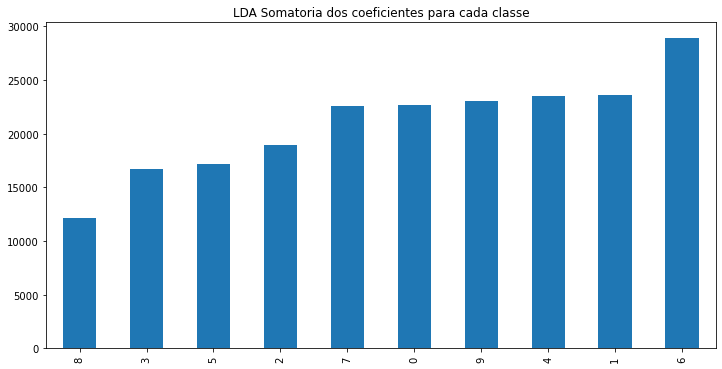

In [79]:
# Quanto maior o valor, maior é a separabilidade da classe
pd.Series(np.abs(modelLDA.coef_).sum(axis=1), index=modelLDA.classes_).sort_values().plot.bar(
    figsize=(12, 6), title="LDA Somatoria dos coeficientes para cada classe"
)

In [114]:
X_LDA_2D = modelLDA.fit_transform(X_train, y_train.ravel())

In [123]:
traceLDA = go.Scatter(
    x = X_LDA_2D[:,0],
    y = X_LDA_2D[:,1],
#     name = Target,
#     hoveron = Target,
    mode = 'markers',
    text = mnist_data.iloc[:,:1],
    showlegend = True,
    marker = dict(
        size = 8,
        color = mnist_data.iloc[:,:1],
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
    data = [traceLDA]

layout = go.Layout(
    title= 'Linear Discriminant Analysis (LDA)',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Linear Discriminant',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Linear Discriminant',
        ticklen= 5,
        gridwidth= 2,
    ),
    showlegend= False
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter')

### Random Forest

In [96]:
clfR = RandomForestClassifier()
clfR.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [103]:
modelLDA.coef_

array([[-1.38443645e-16, -5.88750568e-16,  8.59030298e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.24964869e-16, -6.40930305e-16, -2.34275221e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.57043356e-16,  1.04978124e-16, -3.81381912e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-9.84964748e-16, -1.70092650e-15, -1.13360204e-15, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.61092142e-16, -1.06050812e-16,  6.63143700e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.20308542e-16,  1.24993747e-15, -5.69708266e-16, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [105]:
clfR.

DecisionTreeClassifier()

In [99]:
score=clfR.score(X_train, y_train)
ypred=clfR.predict(X_test)
cm = confusion_matrix(y_test, ypred)

print("Score: ",score)
print(cm)
print(classification_report(y_test, ypred))

Score:  1.0
[[1202    0    1    0    1    1    6    0   10    0]
 [   0 1388    3    7    2    1    3    2    3    1]
 [   8    2 1151    5    3    2    4   10   14    3]
 [   4    1   26 1219    0   17    0    6    8    6]
 [   0    4    4    0 1208    0    7    0    4   23]
 [   8    1    4   16    2 1125   13    1   10    9]
 [   6    5    0    0    5    6 1230    0    1    0]
 [   0    9   12    2    8    0    0 1256    2   18]
 [   6    7    6    9    7    8    3    1 1182    9]
 [   6    4    5   18   13    5    0   13   13 1166]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1221
           1       0.98      0.98      0.98      1410
           2       0.95      0.96      0.95      1202
           3       0.96      0.95      0.95      1287
           4       0.97      0.97      0.97      1250
           5       0.97      0.95      0.96      1189
           6       0.97      0.98      0.98      1253
           7       0.97 